## About Dataset
### Context and Content
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

### Note:

The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.
Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

In [1]:
import numpy as np 
import pandas as pd 

        
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# import image module
from IPython.display import Image #for importing images


In [2]:
train=pd.read_csv("aug_train.csv")
test=pd.read_csv("aug_test.csv")


In [3]:
#First understanding the data we look into the different attributes of the data.

In [4]:
train.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Target Categorical
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1,Looking for a job change
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,Not Looking for a job change
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0,Not Looking for a job change
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1,Looking for a job change
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,Not Looking for a job change
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1,Looking for a job change
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0,Not Looking for a job change
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1,Looking for a job change
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1,Looking for a job change
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0,Not Looking for a job change


In [5]:
#Understanding different data types and verifying whether the data types are right or wrong.

In [6]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
Target Categorical         object
dtype: object

In [7]:
# Finding out how many null data points are there.

In [8]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
Target Categorical           0
dtype: int64

In [9]:
# Checking how many rows and columns in total are there.

In [10]:
train.shape

(19158, 15)

# Data Cleaning

In [119]:
# get the image
Image(url="https://miro.medium.com/max/500/1*yWFQiGjlgHUVYeh4ELELyw.jpeg", width=500, height=600)

In [11]:
# The reason behind data cleaning is to remove the outliers and missing datapoints for the proper analysis.
# After analysing the dataset we dropped the rows having null values.
# There were sufficient data points left even after dropping the rows containing missing values.

In [12]:
# Data cleaning of train dataset
train=train.dropna()
train.head(10)
train.shape

(8955, 15)

In [13]:
# We can use resetting index to reset the index of the updated DataFrame.

In [14]:
train=train.reset_index(drop=True)
train.head(10)
train.shape

(8955, 15)

In [15]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,8955.000000,8955.000000,8955.000000,8955.000000
mean,16869.638749,0.844570,65.074930,0.165606
std,9963.804718,0.116178,60.235087,0.371747
min,2.000000,0.448000,1.000000,0.000000
25%,8150.000000,0.794000,23.000000,0.000000
50%,16924.000000,0.910000,47.000000,0.000000
75%,25902.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [16]:
# Checking no. of unique values in all columns

In [17]:
for column in train.columns:
    print(f"{column}: Number of unique values {train[column].nunique()}")
    print("==========================================================")

enrollee_id: Number of unique values 8955
city: Number of unique values 116
city_development_index: Number of unique values 91
gender: Number of unique values 3
relevent_experience: Number of unique values 2
enrolled_university: Number of unique values 3
education_level: Number of unique values 3
major_discipline: Number of unique values 6
experience: Number of unique values 22
company_size: Number of unique values 8
company_type: Number of unique values 6
last_new_job: Number of unique values 6
training_hours: Number of unique values 241
target: Number of unique values 2
Target Categorical: Number of unique values 2


In [18]:
# Data cleaning of test dataset
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [19]:
test.shape

(2129, 13)

In [20]:
# We cannot drop the null values in test dataset as the submission file has the same number of values to be predicted.
# So, we will have to fill the empty values in test dataset...

In [21]:
# Filling all the columns with mode of that column.

In [22]:
# Filling gender column 

print(test['gender'].mode())

0    Male
dtype: object


In [23]:
test['gender'].fillna(value='Male',inplace=True)

In [24]:
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [25]:
#Filling enrolled_university column
test['enrolled_university'].mode()
test['enrolled_university'].fillna(value='no_enrollment',inplace=True)

#Filling education_level
test['education_level'].mode()
test['education_level'].fillna(value='Graduate',inplace=True)

#Filling major_discipline 
test['major_discipline'].mode()
test['major_discipline'].fillna(value='STEM',inplace=True)

#Filling experience
test['experience'].mode()
test['experience'].fillna(value='>20',inplace=True)

#Filling company size
test['company_size'].mode()
test['company_size'].fillna(value='50-99',inplace=True)

#Filling company_type
test['company_type'].mode()
test['company_type'].fillna(value='Pvt Ltd',inplace=True)

#Filling last new job
test['last_new_job'].mode()
test['last_new_job'].fillna(value='1',inplace=True)


In [26]:
# Rechecking null values sum.

In [27]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

# Data visualization

In [28]:
# Visualizing the distribution of different attributes

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


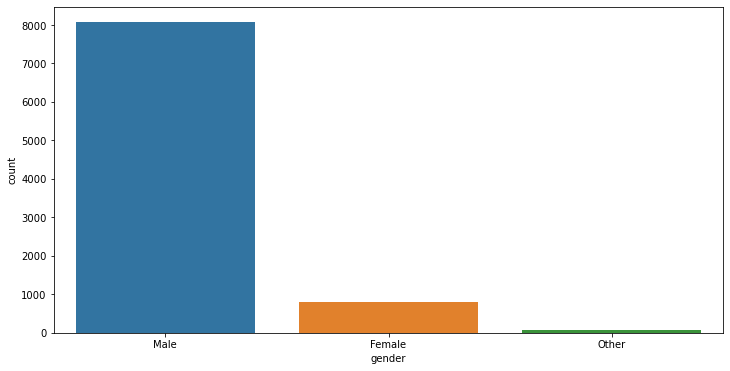

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(train['gender'])
plt.show()

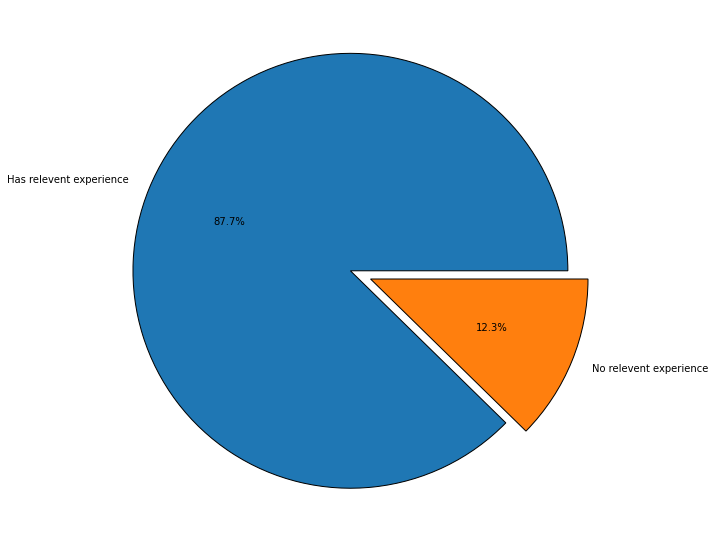

In [30]:
index=train['relevent_experience'].value_counts().index
values=train['relevent_experience'].value_counts()
plt.figure(figsize=(20,10))
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'},explode=[0.1,0])
plt.show()

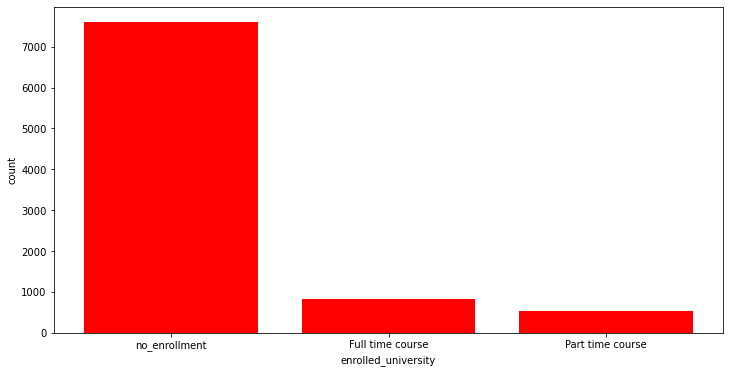

In [31]:
index=train['enrolled_university'].value_counts().index
values=train['enrolled_university'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(index, values, color ='red')
plt.xlabel("enrolled_university")
plt.ylabel("count")
plt.show()

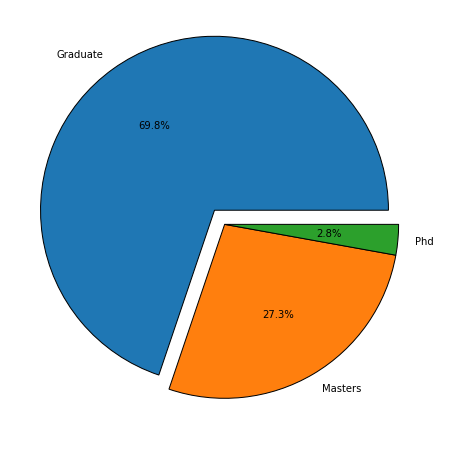

In [32]:
index=train['education_level'].value_counts().index
values=train['education_level'].value_counts()
plt.figure(figsize=(16,8))
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'},explode=[0.1,0,0])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


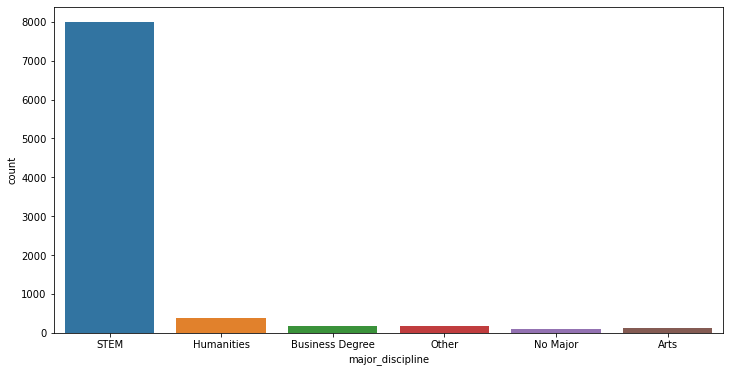

STEM               7989
Humanities          378
Other               177
Business Degree     170
Arts                129
No Major            112
Name: major_discipline, dtype: int64


In [33]:
plt.figure(figsize=(12,6))
sns.countplot(train['major_discipline'])
plt.show()
print(train['major_discipline'].value_counts())

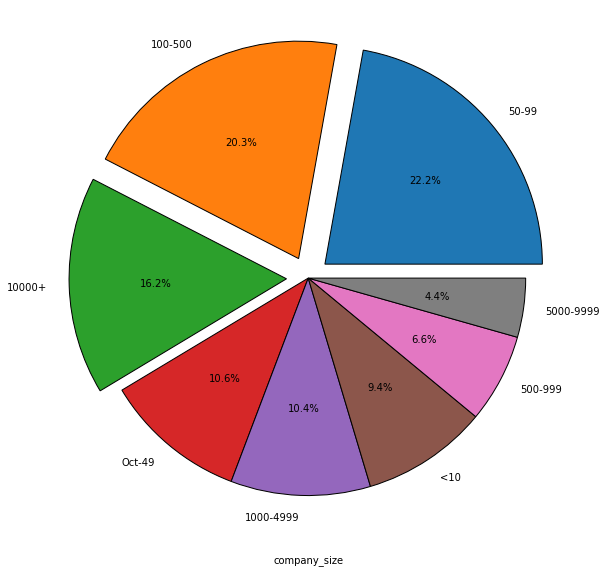

In [34]:
index=train['company_size'].value_counts().index
values=train['company_size'].value_counts()
plt.figure(figsize=(18,10))
plt.xlabel('company_size')
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={"edgecolor":"black"},explode=[0.1,0.1,0.1,0,0,0,0,0])
plt.show()

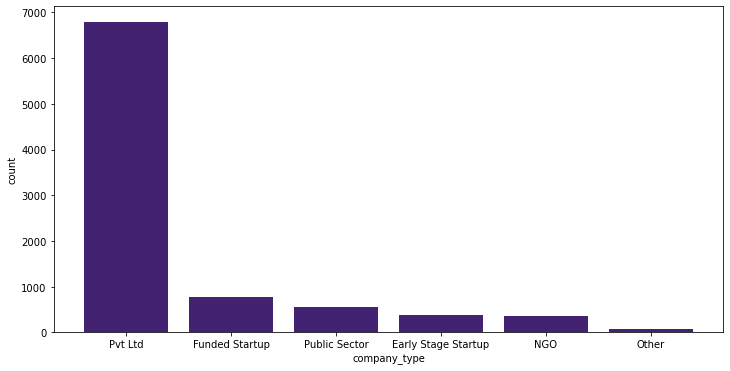

In [35]:
index=train['company_type'].value_counts().index
values=train['company_type'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(index, values, color ='#432371')
plt.xlabel("company_type")
plt.ylabel("count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


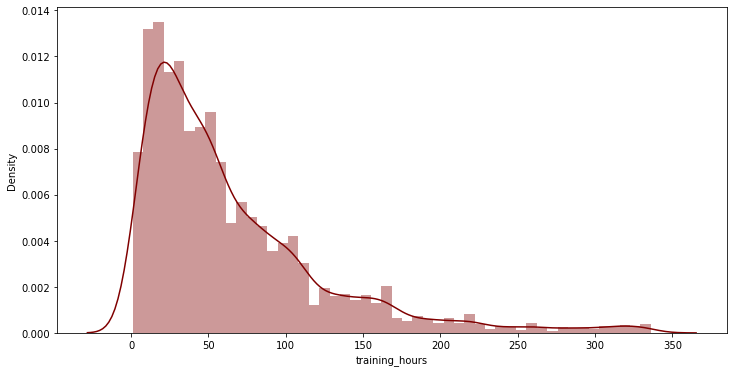

In [36]:
plt.figure(figsize=(12,6))
sns.distplot(train['training_hours'],color='maroon')
plt.show()

In [37]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Target Categorical
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,Not Looking for a job change
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,Not Looking for a job change
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1,Looking for a job change
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1,Looking for a job change
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0,Not Looking for a job change


In [38]:
train['experience'].value_counts()

>20    1881
5       575
10      551
6       535
9       533
7       485
4       480
3       428
15      398
8       398
11      372
14      333
16      304
2       297
12      293
13      235
17      206
19      179
18      168
1       121
<1       97
20       86
Name: experience, dtype: int64

In [39]:
# Only >20 years experience has a large number of values than other. So, there is no need to compare them on that basis as it will be in appropriate. So, we will use data of only exp>20.

In [40]:
exp_20=train.loc[train['experience']=='>20']
exp_20.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Target Categorical
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,Not Looking for a job change
5,25619,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,3,23,0,Not Looking for a job change
11,14928,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,3,40,0,Not Looking for a job change
13,26966,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,>4,82,0,Not Looking for a job change
16,10164,city_114,0.926,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,4,42,1,Looking for a job change


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


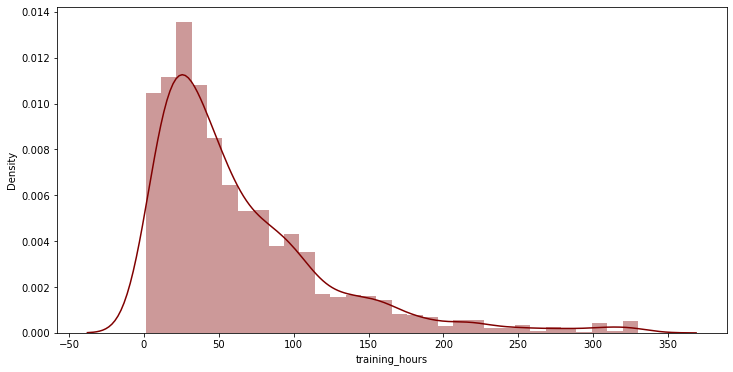

In [41]:
plt.figure(figsize=(12,6))
sns.distplot(exp_20['training_hours'],color='maroon')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


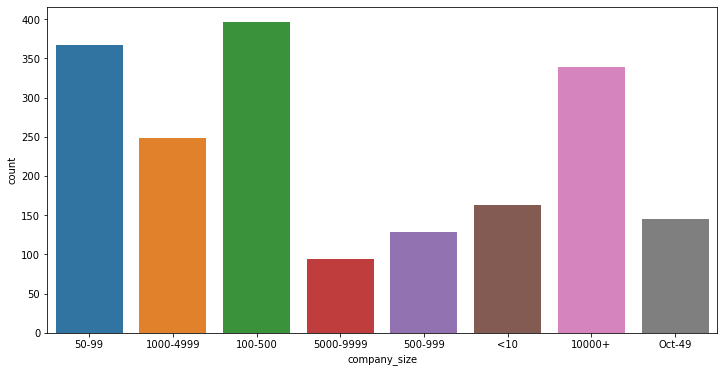

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(exp_20['company_size'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


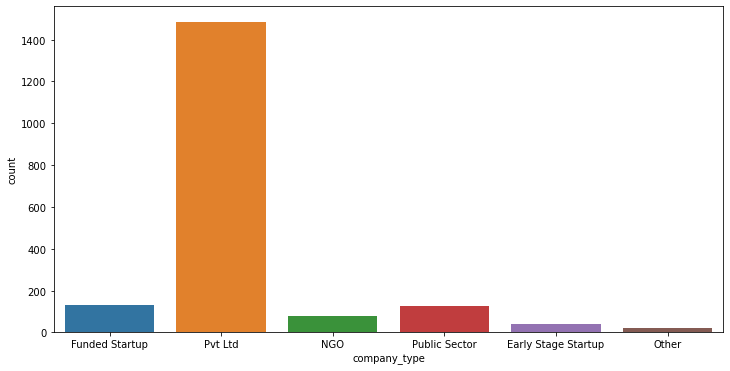

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(exp_20['company_type'])
plt.show()

In [44]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Target Categorical
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,Not Looking for a job change
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,Not Looking for a job change
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1,Looking for a job change
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1,Looking for a job change
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0,Not Looking for a job change


In [45]:
da=train.drop('city',axis=1) #Dropping city column and plotting all variables against target.

In [46]:
numerical_features = da.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = da.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))
print(categorical_features)

Number of Numerical features:  4
Index(['enrollee_id', 'city_development_index', 'training_hours', 'target'], dtype='object')
Number of Categorical features:  10
Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'Target Categorical'],
      dtype='object')


In [47]:
# Visualization of all the attributes with regards to "Not looking" V/s "Looking for job change" (Target).

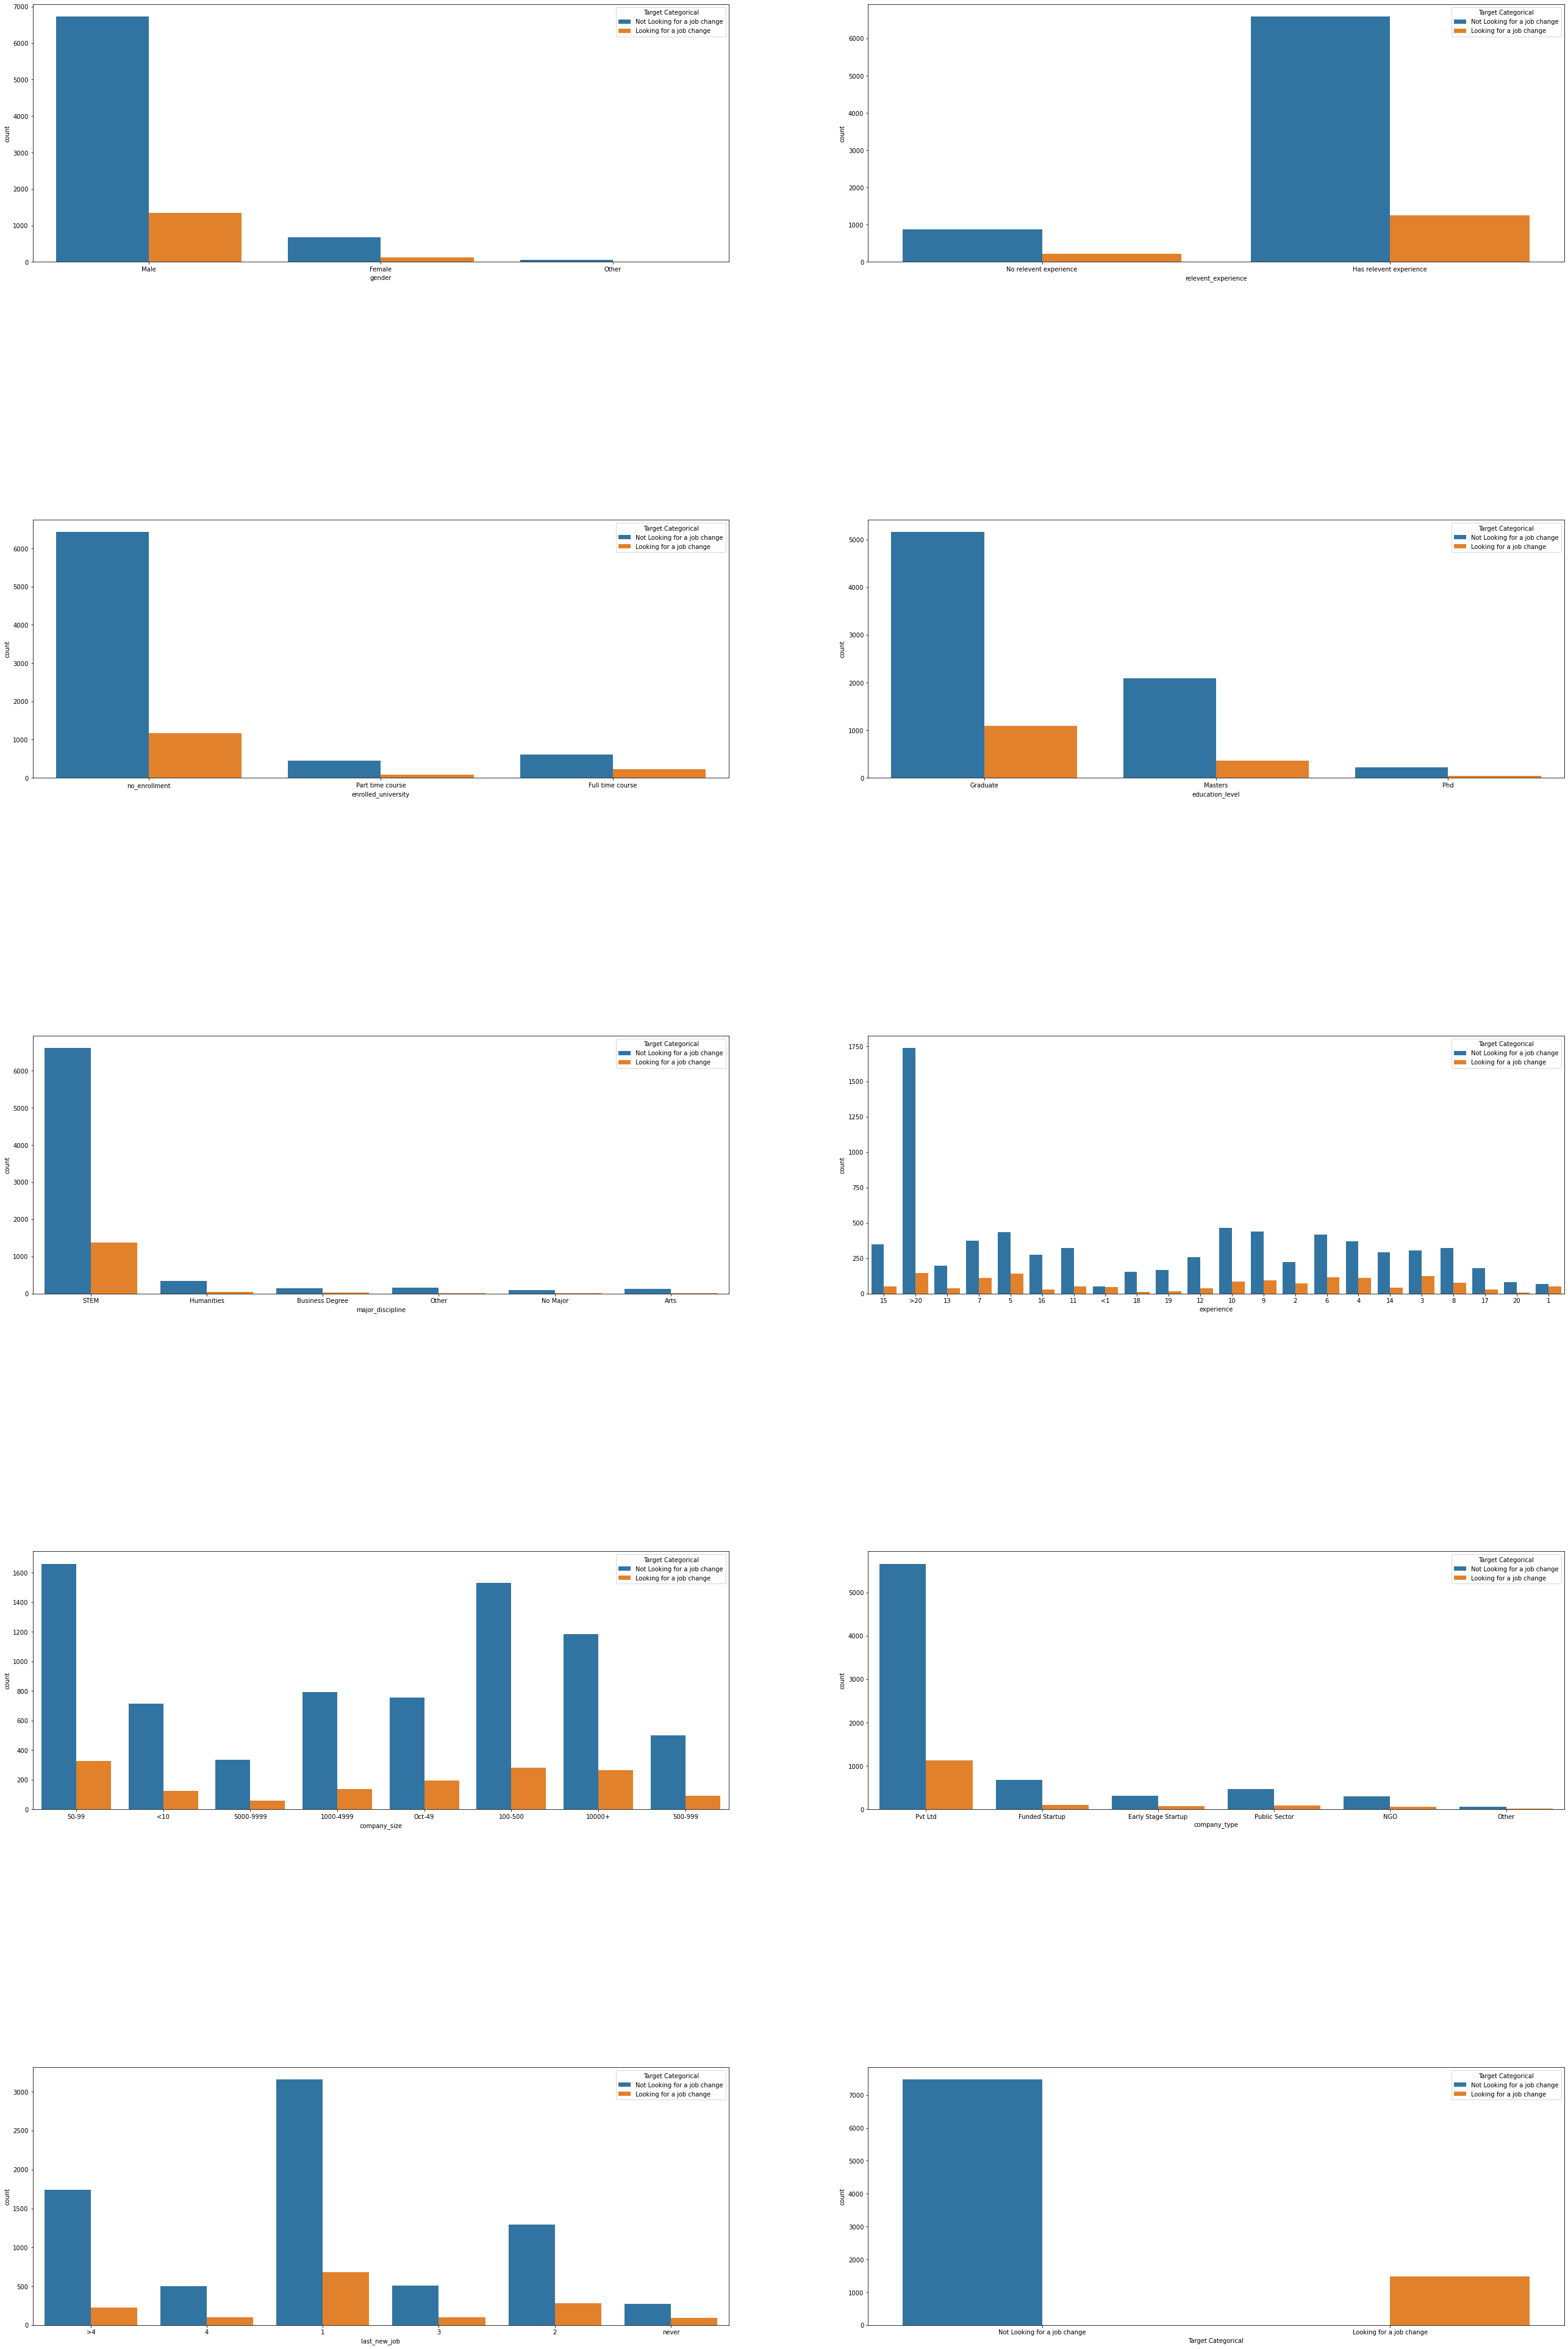

In [48]:
### Plot against target

fig,axes = plt.subplots(5,2,figsize=(45,70))
for idx,cat_col in enumerate(categorical_features):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=da,hue='Target Categorical',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

## Creating Dummies

In [49]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Target Categorical
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,Not Looking for a job change
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,Not Looking for a job change
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1,Looking for a job change
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1,Looking for a job change
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0,Not Looking for a job change


In [50]:
train['relevent_experience']=train['relevent_experience'].replace({'No relevent experience':0,'Has relevent experience':1})

In [51]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Target Categorical
0,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,Not Looking for a job change
1,666,city_162,0.767,Male,1,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,Not Looking for a job change
2,402,city_46,0.762,Male,1,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1,Looking for a job change
3,27107,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1,Looking for a job change
4,23853,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0,Not Looking for a job change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,21319,city_21,0.624,Male,0,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1,Looking for a job change
8951,251,city_103,0.920,Male,1,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1,Looking for a job change
8952,32313,city_160,0.920,Female,1,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0,Not Looking for a job change
8953,29754,city_103,0.920,Female,1,no_enrollment,Graduate,Humanities,7,Oct-49,Funded Startup,1,25,0,Not Looking for a job change


In [52]:
dummies=pd.get_dummies(train[['enrolled_university']])
train = pd.concat([train.drop(['enrolled_university'],axis=1), dummies],axis=1)

In [53]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Target Categorical,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment
0,29725,city_40,0.776,Male,0,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,Not Looking for a job change,0,0,1
1,666,city_162,0.767,Male,1,Masters,STEM,>20,50-99,Funded Startup,4,8,0,Not Looking for a job change,0,0,1
2,402,city_46,0.762,Male,1,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1,Looking for a job change,0,0,1
3,27107,city_103,0.920,Male,1,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1,Looking for a job change,0,0,1
4,23853,city_103,0.920,Male,1,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0,Not Looking for a job change,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,21319,city_21,0.624,Male,0,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1,Looking for a job change,1,0,0
8951,251,city_103,0.920,Male,1,Masters,STEM,9,50-99,Pvt Ltd,1,36,1,Looking for a job change,0,0,1
8952,32313,city_160,0.920,Female,1,Graduate,STEM,10,100-500,Public Sector,3,23,0,Not Looking for a job change,0,0,1
8953,29754,city_103,0.920,Female,1,Graduate,Humanities,7,Oct-49,Funded Startup,1,25,0,Not Looking for a job change,0,0,1


In [54]:
dummies=pd.get_dummies(train[['gender']])
train = pd.concat([train.drop(['gender'],axis=1), dummies],axis=1)

In [55]:
train=train.drop("education_level",axis=1) #Dropping education level

In [56]:
train

,enrollee_id,city,city_development_index,relevent_experience,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Target Categorical,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,gender_Female,gender_Male,gender_Other
0,29725,city_40,0.776,0,STEM,15,50-99,Pvt Ltd,>4,47,0,Not Looking for a job change,0,0,1,0,1,0
1,666,city_162,0.767,1,STEM,>20,50-99,Funded Startup,4,8,0,Not Looking for a job change,0,0,1,0,1,0
2,402,city_46,0.762,1,STEM,13,<10,Pvt Ltd,>4,18,1,Looking for a job change,0,0,1,0,1,0
3,27107,city_103,0.920,1,STEM,7,50-99,Pvt Ltd,1,46,1,Looking for a job change,0,0,1,0,1,0
4,23853,city_103,0.920,1,STEM,5,5000-9999,Pvt Ltd,1,108,0,Not Looking for a job change,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,21319,city_21,0.624,0,STEM,1,100-500,Pvt Ltd,1,52,1,Looking for a job change,1,0,0,0,1,0
8951,251,city_103,0.920,1,STEM,9,50-99,Pvt Ltd,1,36,1,Looking for a job change,0,0,1,0,1,0
8952,32313,city_160,0.920,1,STEM,10,100-500,Public Sector,3,23,0,Not Looking for a job change,0,0,1,1,0,0
8953,29754,city_103,0.920,1,Humanities,7,Oct-49,Funded Startup,1,25,0,Not Looking for a job change,0,0,1,1,0,0


In [57]:
dummies=pd.get_dummies(train[['major_discipline']])
train = pd.concat([train.drop(['major_discipline'],axis=1), dummies],axis=1)

In [58]:
dummies=pd.get_dummies(train[['experience']])
train = pd.concat([train.drop(['experience'],axis=1), dummies],axis=1)

In [59]:
dummies=pd.get_dummies(train[['company_size']])
train = pd.concat([train.drop(['company_size'],axis=1), dummies],axis=1)

In [60]:
dummies=pd.get_dummies(train[['company_type']])
train = pd.concat([train.drop(['company_type'],axis=1), dummies],axis=1)

In [61]:
dummies=pd.get_dummies(train[['last_new_job']])
train = pd.concat([train.drop(['last_new_job'],axis=1), dummies],axis=1)

### Similarly in test dataset

In [62]:
test['relevent_experience']=test['relevent_experience'].replace({'No relevent experience':0,'Has relevent experience':1})

In [63]:
test=test.drop("education_level",axis=1)

In [64]:
dummies=pd.get_dummies(test[['gender']])
test = pd.concat([test.drop(['gender'],axis=1), dummies],axis=1)

In [65]:
dummies=pd.get_dummies(test[['enrolled_university']])
test = pd.concat([test.drop(['enrolled_university'],axis=1), dummies],axis=1)

In [66]:
dummies=pd.get_dummies(test[['major_discipline']])
test = pd.concat([test.drop(['major_discipline'],axis=1), dummies],axis=1)

In [67]:
dummies=pd.get_dummies(test[['experience']])
test = pd.concat([test.drop(['experience'],axis=1), dummies],axis=1)

In [68]:
dummies=pd.get_dummies(test[['company_size']])
test = pd.concat([test.drop(['company_size'],axis=1), dummies],axis=1)

In [69]:
dummies=pd.get_dummies(test[['company_type']])
test = pd.concat([test.drop(['company_type'],axis=1), dummies],axis=1)

In [70]:
dummies=pd.get_dummies(test[['last_new_job']])
test = pd.concat([test.drop(['last_new_job'],axis=1), dummies],axis=1)

In [71]:
print(train.shape)
print(test.shape)

(8955, 61)
(2129, 59)


# Machine Learning (modelling)

In [118]:
# get the image
Image(url="https://imageio.forbes.com/specials-images/dam/imageserve/1129869424/0x0.jpg?format=jpg&width=1200", width=500, height=600)

In [72]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'training_hours', 'target', 'Target Categorical',
       'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'gender_Female', 'gender_Male',
       'gender_Other', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'experience_1', 'experience_10',
       'experience_11', 'experience_12', 'experience_13', 'experience_14',
       'experience_15', 'experience_16', 'experience_17', 'experience_18',
       'experience_19', 'experience_2', 'experience_20', 'experience_3',
       'experience_4', 'experience_5', 'experience_6', 'experience_7',
       'experience_8', 'experience_9', 'experience_<1', 'experience_>20',
       'company_size_100-500', 'company_size_1000-4999', 'company_size_10000+

# Splitting Train dataset into train and test data set.

In [73]:
# Taking all relevant independet varibales in X.
# Taking dependent varibale "Target" into y.

In [74]:
X=train.drop(['enrollee_id','city','target','Target Categorical'],axis=1)
y=train[['target']]

In [75]:
import sklearn
from sklearn.model_selection import train_test_split

In [76]:
# using the following code the data was split in following ways
# 70% data was taken into train while 30% into test.
# Here we have choosen Random_state as 42.

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [78]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6268, 57)
(6268, 1)
(2687, 57)
(2687, 1)


# Fitting different models and finding the highest score to choose the model.

In [120]:

Image(url="https://blogs.gartner.com/jitendra-subramanyam/files/2019/04/machine-learning-prediction.png", width=500, height=600)    

# Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [80]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
predictions=model.predict(X_test)

In [82]:
model.score(X_test,y_test)

0.8395980647562337

# Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier()

In [84]:
model_2.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
predictions_2=model_2.predict(X_test)

In [86]:
model_2.score(X_test,y_test)

0.7692593970971343

# Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier()

In [88]:
model_3.fit(X_train,y_train)

<ipython-input-88-90edc2e1be67>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(X_train,y_train)


RandomForestClassifier()

In [89]:
predictions_3=model_3.predict(X_test)

In [90]:
model_3.score(X_test,y_test)

0.8448083364346856

# KNeighbors Classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier
model_4=KNeighborsClassifier()

In [92]:
model_4.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [93]:
predictions_4=model_4.predict(X_test)

In [94]:
model_4.score(X_test,y_test)

0.8228507629326386

In [95]:
# SVM

In [96]:
from sklearn.svm import SVC

In [97]:
model_5=SVC()

In [98]:
model_5.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [99]:
predictions_5=model_5.predict(X_test)

In [100]:
model_5.score(X_test,y_test)

0.8373650911797543

#### Test score of Random forest model is maximum. so now we will predict our target varibale by using this algorithm.

In [101]:
test=test.drop(['enrollee_id','city'],axis=1)

In [102]:
model_3.fit(X,y)

<ipython-input-102-f99ca293d1f2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(X,y)


RandomForestClassifier()

In [103]:
final_predictions=model_3.predict(test)

In [104]:
final_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
# Final prediction of the test dataset.
# 0 = not looking for new job, & 1 = Looking for a new job.

In [121]:

Image(url="https://thumbs.dreamstime.com/b/good-results-ahead-traffic-sign-good-results-ahead-ahead-traffic-sign-blue-sky-159017767.jpg", width=500, height=600)    

In [106]:
with np.printoptions(threshold=np.inf):
    print(final_predictions)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

In [107]:
df=pd.read_csv("sample_submission.csv")

In [108]:
df = pd.DataFrame(df)

In [109]:
df['final_predictions'] = final_predictions

In [ ]:
df.to_excel(r'C:\Users\HP\Desktop\PYTHON WORK\Live project henry Harvin\HR Analytics Job Change of Data Scientists\Final prediction.xlsx', index = False)    

In [110]:
df.head(100)

,enrollee_id,target,final_predictions
0,32403,0.5,0
1,9858,0.5,0
2,31806,0.5,0
3,27385,0.5,0
4,27724,0.5,0
...,...,...,...
95,2934,0.5,0
96,12919,0.5,0
97,4386,0.5,0
98,22462,0.5,0


In [111]:
# Export prediction values into excel

In [112]:
df.to_excel(r'C:\Users\HP\Desktop\PYTHON WORK\Live project henry Harvin\HR Analytics Job Change of Data Scientists\Final prediction.xlsx', index = False)

In [116]:
# get the image
Image(url="https://www.thebalancecareers.com/thmb/EofDGu9_H5CPd_67FCCayRRobH8=/300x200/filters:no_upscale():max_bytes(150000):strip_icc():saturation(0.2):brightness(10):contrast(5):format(webp)/GettyImages-185002046-5772f4153df78cb62ce1ad69.jpg", width=500, height=600)